<html> <h1 style="font-style:bold; color:blue;"> Machine Learning in Finance </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-11 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Credit Scoring </h2> </html>


#### This is a training example of credit scoring using the Kaggle.com Dataset
(https://www.kaggle.com/datasets/urvishvekariya/credit-risk-assessment/data)

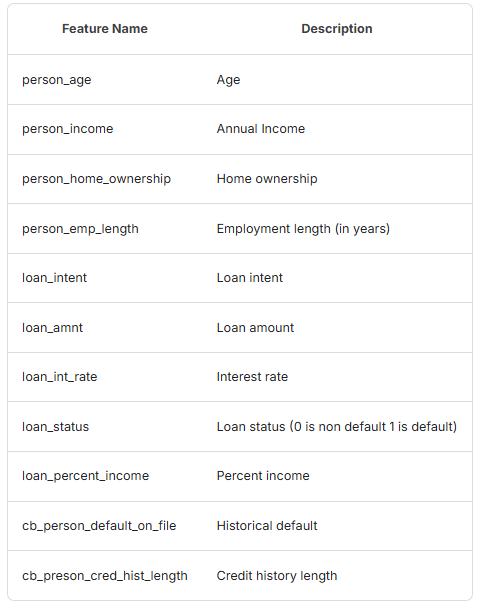

In [66]:
#pip install seaborn

______________________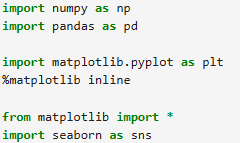

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline

from matplotlib import *
import seaborn as sns

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

___________________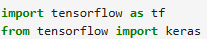

In [3]:
import tensorflow as tf
from tensorflow import keras

/Users/addicted/Desktop/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


___________________

In [70]:
print(tf.__version__)

2.20.0


______________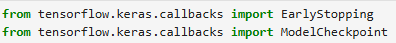

In [4]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

__________________

In [5]:
np.random.seed(42)

_____________________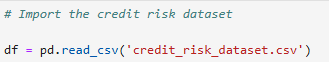

In [6]:
df = pd.read_csv('credit_risk_dataset.csv')

____________________

In [7]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


__________________________

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


<html> <h3 style="font-style:italic; color:blue;"> Data preprocessing </h3> </html>

___________________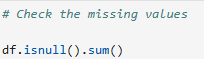

In [9]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [10]:
# Impute missing values with mean

imputer = SimpleImputer(strategy='mean')

df['person_emp_length'] = imputer.fit_transform(df[['person_emp_length']])
df['loan_int_rate'] = imputer.fit_transform(df[['loan_int_rate']])

____________________

In [11]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [79]:
# It doesn't have any NaN(s)

____________________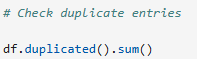

In [12]:
df.duplicated().sum()

165

_________________________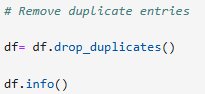

In [13]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_amnt                   32416 non-null  int64  
 6   loan_int_rate               32416 non-null  float64
 7   loan_status                 32416 non-null  int64  
 8   loan_percent_income         32416 non-null  float64
 9   cb_person_default_on_file   32416 non-null  object 
 10  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.0+ MB


_______________________________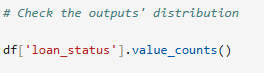

In [14]:
df['loan_status'].value_counts()

loan_status
0    25327
1     7089
Name: count, dtype: int64

__________________________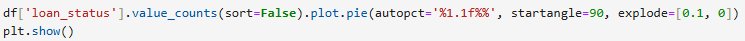

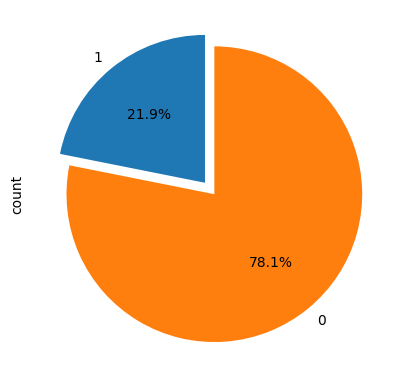

In [15]:
df['loan_status'].value_counts(sort=False).plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.1, 0])
plt.show()

In [84]:
# The dataset is unbalanced

_____________________________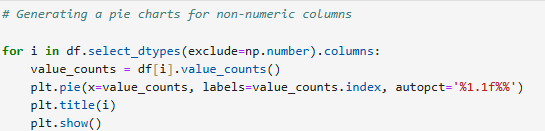

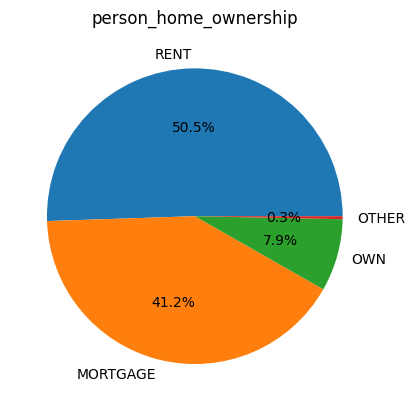

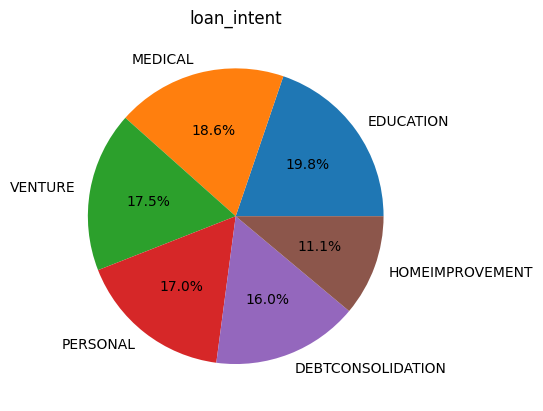

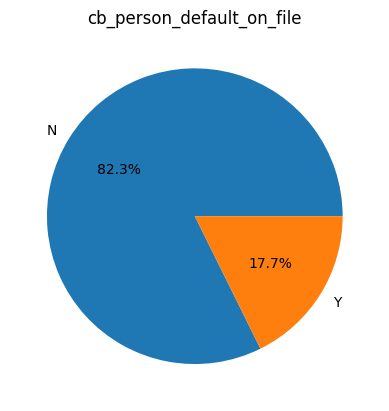

In [16]:
for i in df.select_dtypes(exclude=np.number).columns:
    value_counts = df[i].value_counts()
    plt.pie(x=value_counts, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(i)
    plt.show()

_____________________________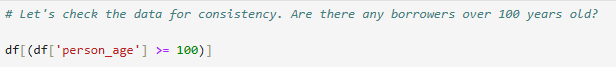

In [17]:
df[(df['person_age'] >=100)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,20000,11.011695,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.730000,0,0.00,N,25


#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [87]:
# For this analysis, all data entries with age 100 and above can be disregarded. This is not of importance

df = df.drop(df[(df['person_age'] >= 100)].index)

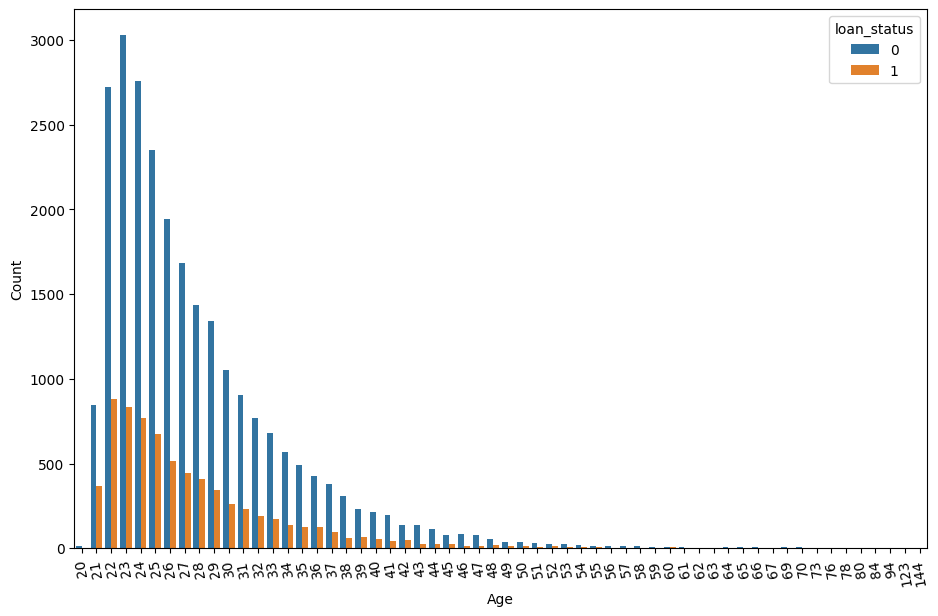

In [18]:
fig = plt.figure(figsize=(11, 7))
sns.countplot(data = df, x = 'person_age', hue = 'loan_status')

plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=100)
plt.show();

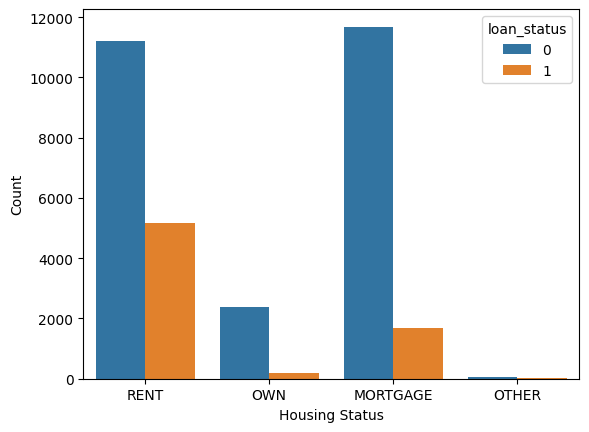

In [19]:
sns.countplot(data = df, x = 'person_home_ownership', hue = 'loan_status')

plt.xlabel('Housing Status')
plt.ylabel('Count')
plt.show();

In [90]:
# Renters often default on loans, homeowners rarely do

______________________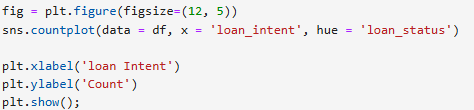

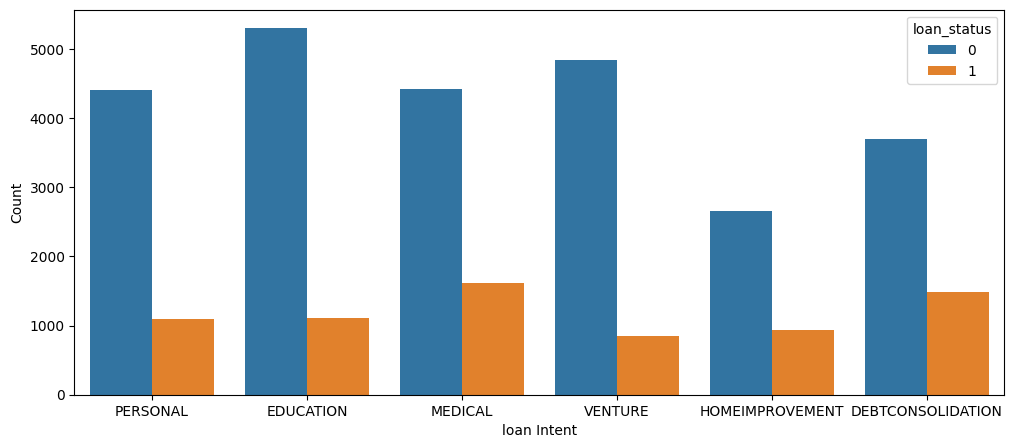

In [20]:
fig = plt.figure(figsize=(12,5))
sns.countplot(data=df, x='loan_intent', hue = 'loan_status')

plt.xlabel('loan Intent')
plt.ylabel('Count')
plt.show();

In [92]:
# Medical loans and Debt-Consolidation loans are more risky

________________________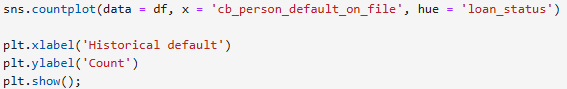

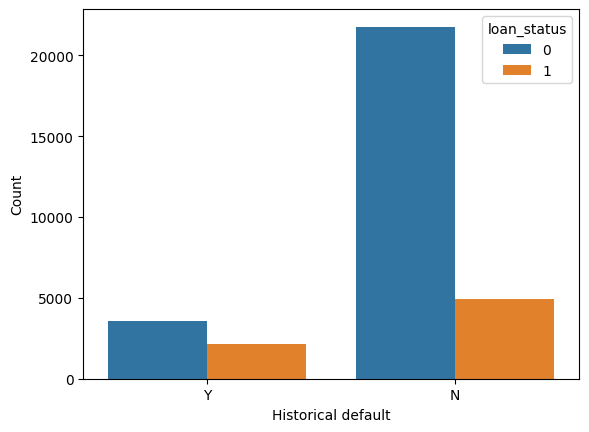

In [21]:
sns.countplot(data=df, x= 'cb_person_default_on_file', hue = 'loan_status')
plt.xlabel('Historical default')
plt.ylabel('Count')
plt.show();

In [94]:
# Those who have defaulted on loans in the past are highly likely to default on a new loan

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [22]:
# transform categorical variables into integers

for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()

For Categorical variables with more than 2 variants, it is more correct to use the one-hot encoding method. 

 Detailed description is here:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html


______________________

In [23]:
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,0,35000,16.02,1,0.59,0,3
1,21,9600,1,5.0,1,1000,11.14,0,0.10,1,2
2,25,9600,2,1.0,2,5500,12.87,1,0.57,1,3


_________________________

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  int64  
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  int64  
 5   loan_amnt                   32416 non-null  int64  
 6   loan_int_rate               32416 non-null  float64
 7   loan_status                 32416 non-null  int64  
 8   loan_percent_income         32416 non-null  float64
 9   cb_person_default_on_file   32416 non-null  int64  
 10  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.0 MB


<html> <h3 style="font-style:italic; color:blue;"> Heat Map</h3> </html>

___________________________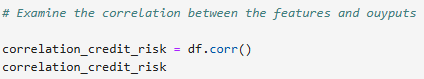

In [25]:
correlation_credit_risk = df.corr()
correlation_credit_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,1.000000,0.173293,0.031606,0.161060,0.024863,0.050680,0.011095,-0.022698,-0.042300,-0.005175,0.859215
person_income,0.173293,1.000000,0.199254,0.133001,0.016495,0.265947,0.000832,-0.145005,-0.254472,0.003617,0.117614
person_home_ownership,0.031606,0.199254,1.000000,0.228470,0.017144,0.129130,-0.131811,-0.218429,-0.135182,0.061571,0.025637
person_emp_length,0.161060,0.133001,0.228470,1.000000,0.016262,0.111872,-0.053035,-0.081303,-0.053013,0.027746,0.143095
loan_intent,0.024863,0.016495,0.017144,0.016262,1.000000,0.018943,0.006193,0.065858,-0.002187,-0.010609,0.016282
loan_amnt,0.050680,0.265947,0.129130,0.111872,0.018943,1.000000,0.139603,0.105736,0.572824,-0.039341,0.041865
loan_int_rate,0.011095,0.000832,-0.131811,-0.053035,0.006193,0.139603,1.000000,0.320063,0.114418,-0.477046,0.015025
loan_status,-0.022698,-0.145005,-0.218429,-0.081303,0.065858,0.105736,0.320063,1.000000,0.379697,-0.179385,-0.016498
loan_percent_income,-0.042300,-0.254472,-0.135182,-0.053013,-0.002187,0.572824,0.114418,0.379697,1.000000,-0.036204,-0.031457
cb_person_default_on_file,-0.005175,0.003617,0.061571,0.027746,-0.010609,-0.039341,-0.477046,-0.179385,-0.036204,1.000000,-0.004169


#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [26]:
corr_order = df.corr()[['loan_status']].sort_values(by='loan_status', ascending=False)
corr_order

,loan_status
loan_status,1.000000
loan_percent_income,0.379697
loan_int_rate,0.320063
loan_amnt,0.105736
loan_intent,0.065858
cb_person_cred_hist_length,-0.016498
person_age,-0.022698
person_emp_length,-0.081303
person_income,-0.145005
cb_person_default_on_file,-0.179385


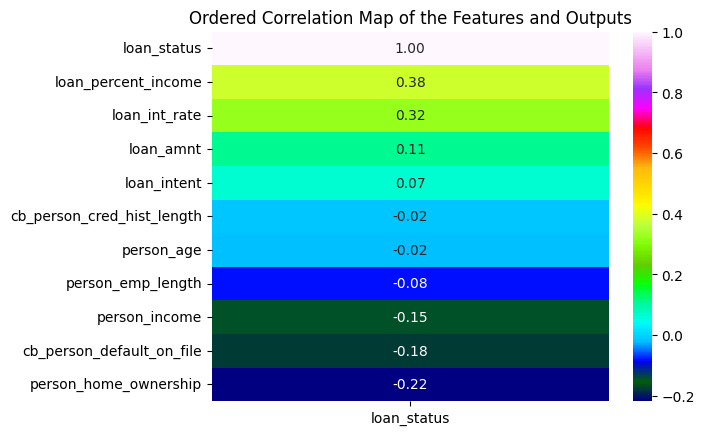

In [27]:
# Heat map for correlations with outputs

sns.heatmap(corr_order, annot=True, fmt='.2f', cmap='gist_ncar')
plt.title('Ordered Correlation Map of the Features and Outputs')
plt.show()

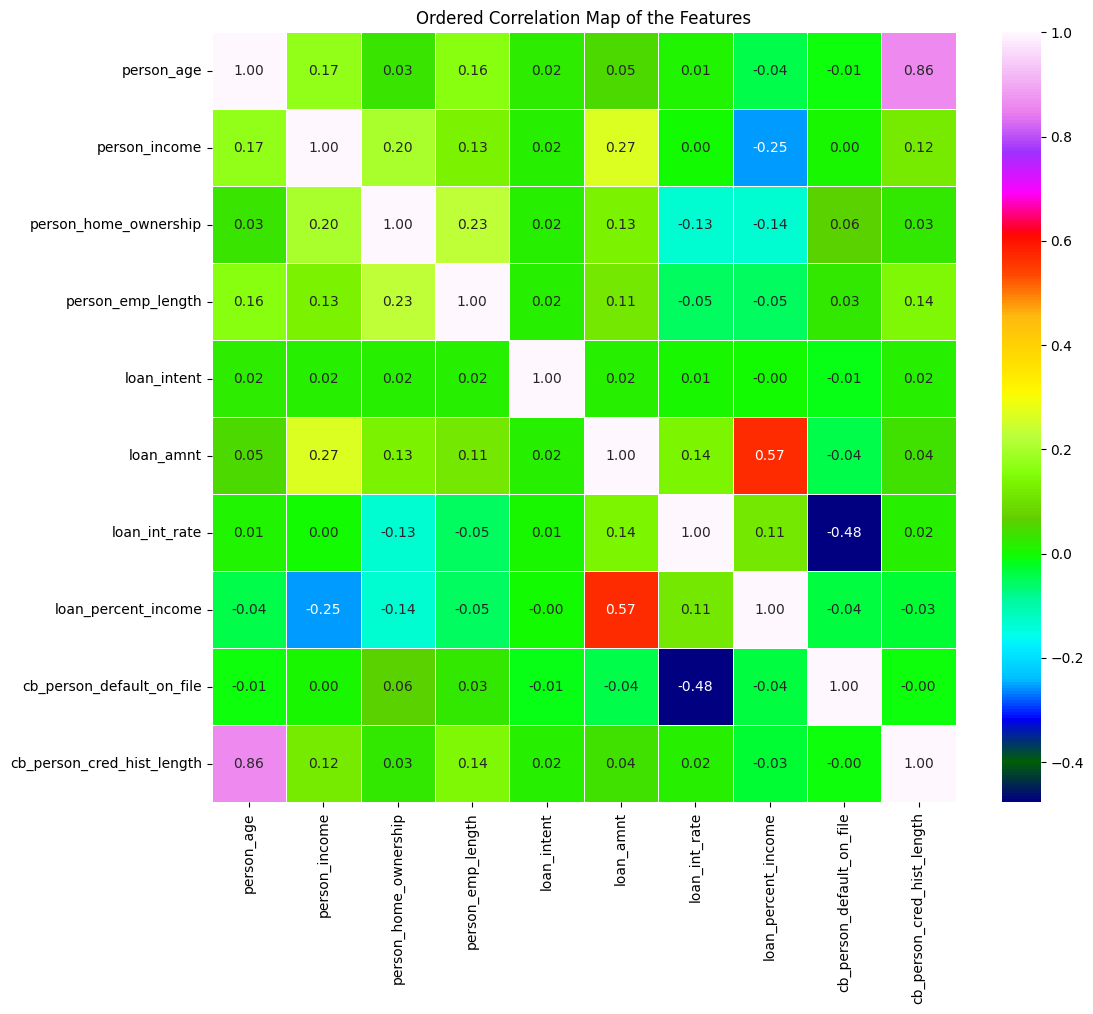

In [28]:
# Heat map for features without outputs

plt.figure(figsize=(12,10))
corr_order_without_target = df.drop('loan_status', axis=1).corr()
sns.heatmap(corr_order_without_target, annot=True, fmt='.2f', annot_kws={"size": 10}, cbar=True, linewidths=0.5, cmap='gist_ncar')
plt.title('Ordered Correlation Map of the Features')
plt.show()

______________________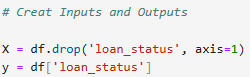

In [29]:
x = df.drop('loan_status', axis=1)
y = df['loan_status']


___________________________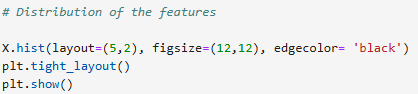

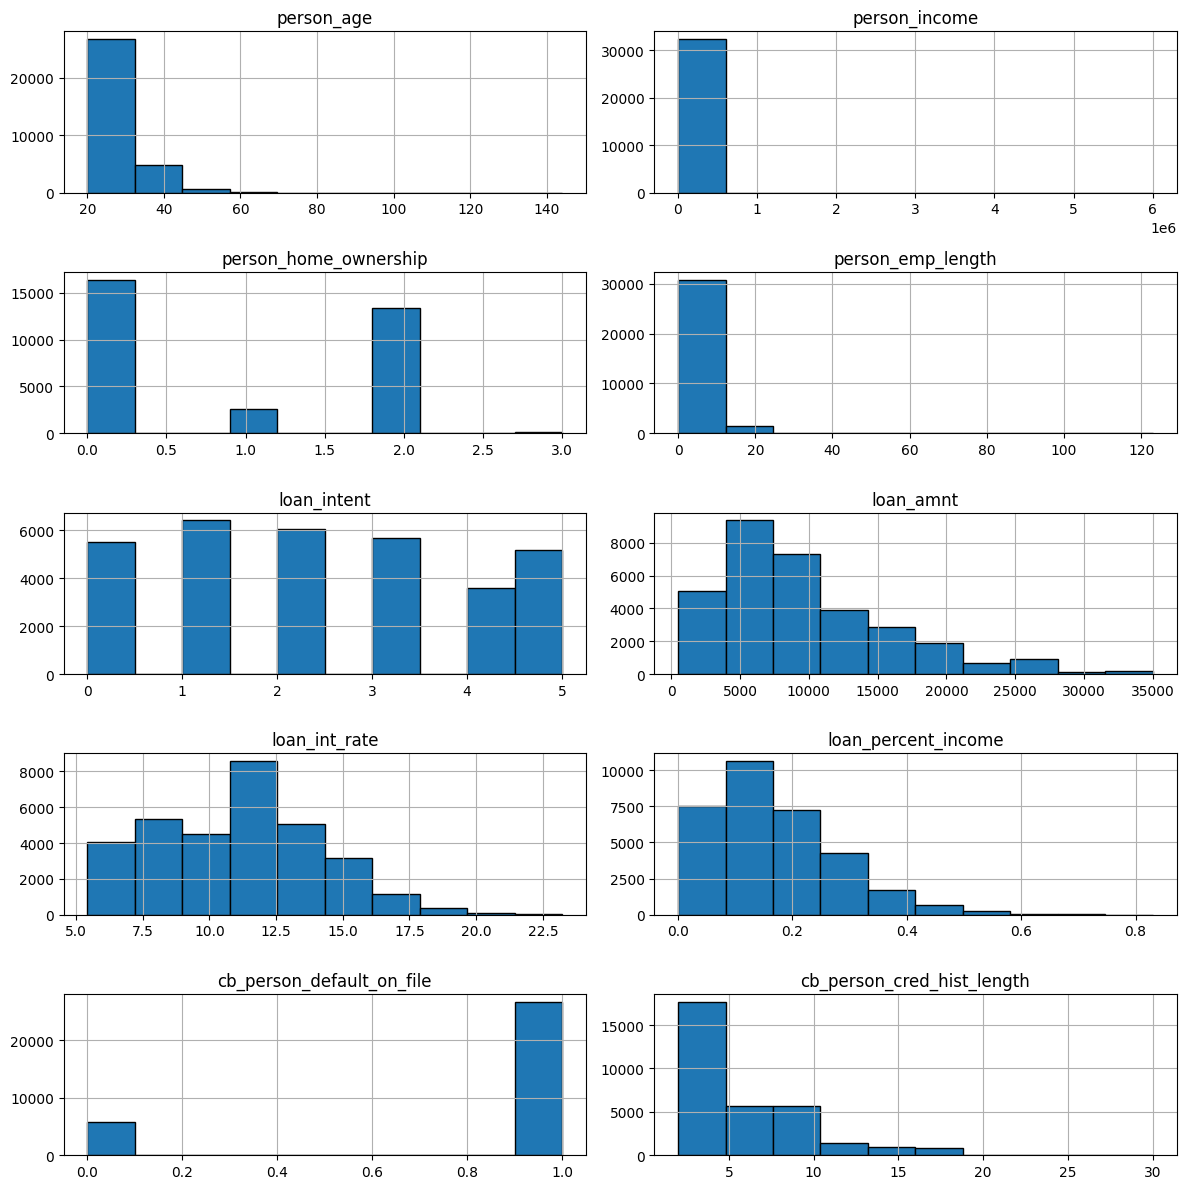

In [30]:
x.hist(layout=(5,2), figsize=(12,12), edgecolor='black')
plt.tight_layout()
plt.show()

#### Now just press 'CTRL' and 'ENTER' keys on the 2 next cells.

In [32]:
# Splitting the datasets into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
# changing the distribution of values so that the mean of the observed values is -0- 
# and the standard deviation is 1.

scaler = StandardScaler()
X_train_imb = scaler.fit_transform(X_train)
X_test_imb =  scaler.transform (X_test)

___________________________

In [34]:
X_train_imb.shape

(25932, 10)

<html> <h3 style="font-style:italic; color:blue;"> Multi Layer Perceptron (MLP) </h3> </html>

____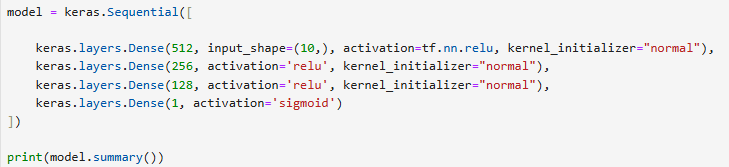

In [35]:
model = keras.Sequential(
    [ 
        keras.layers.Dense(512, input_shape=(10,), activation=tf.nn.relu, kernel_initializer="normal"),
        keras.layers.Dense(256, activation='relu', kernel_initializer="normal"),
        keras.layers.Dense(128, activation='relu', kernel_initializer="normal"),
        keras.layers.Dense(1, activation='sigmoid')
        
    ]
)

print(model.summary())

/Users/addicted/Desktop/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,985 (664.00 KB)

 Trainable params: 169,985 (664.00 KB)

 Non-trainable params: 0 (0.00 B)

None


____________________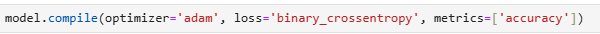

In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

__________________________

In [37]:
mc = ModelCheckpoint('best_model_MLP_w11.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


___________________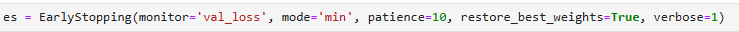

In [38]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

<html> <h4 style="font-style:bold; color:blue;"> If you are using your own laptop without a GPU (Graphics processing unit), 

please change the following parameter in the next cell 

epochs=10
</h4> </html>

__________________________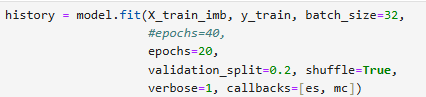

In [39]:
history = model.fit(X_train_imb, y_train, batch_size=32, epochs=40, validation_split=0.2, shuffle=True, verbose=1, callbacks=[es,mc])

Epoch 1/40
587/649 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8283 - loss: 0.3961
Epoch 1: val_loss improved from inf to 0.33315, saving model to best_model_MLP_w11.keras
649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.8305 - loss: 0.3926 - val_accuracy: 0.8666 - val_loss: 0.3332
Epoch 2/40
589/649 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.8737 - loss: 0.3242
Epoch 2: val_loss did not improve from 0.33315
649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.8737 - loss: 0.3240 - val_accuracy: 0.8623 - val_loss: 0.3424
Epoch 3/40
594/649 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.8786 - loss: 0.3079
Epoch 3: val_loss improved from 0.33315 to 0.32138, saving model to best_model_MLP_w11.keras
649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.8785 - loss: 0.3082 - val_accuracy: 0.8766 - val_loss: 0.3214
Epoch 4/40
637/649 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.8840 - loss: 0.3033
Epoch 4: val_loss improved from 0.32138 to 0.31606, saving mod

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

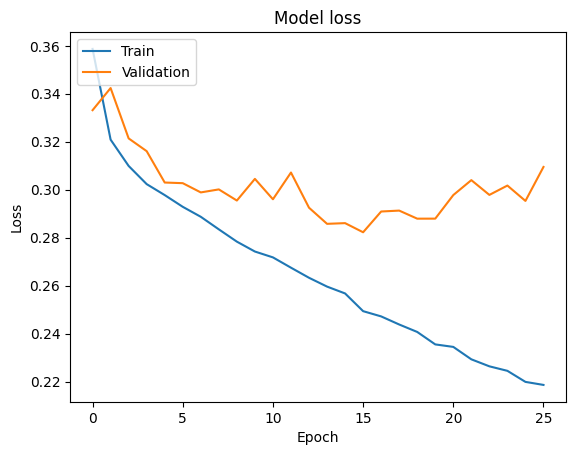

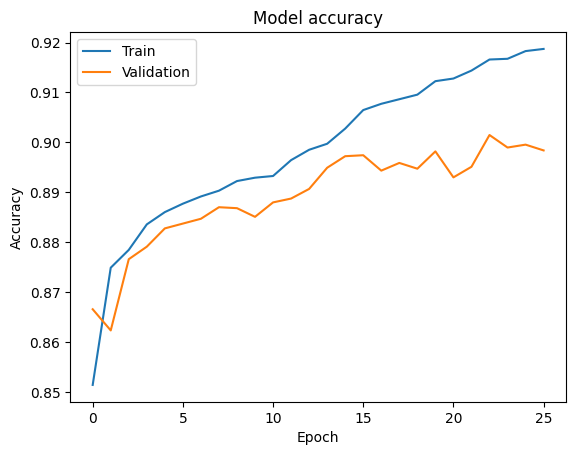

In [40]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

_______________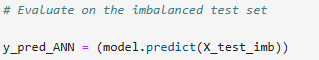

In [43]:
y_pred_ANN = (model.predict(X_test_imb))

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step


#### Now just press 'CTRL' and 'ENTER' keys on the 2 next cells.

In [44]:
print(y_pred_ANN[:10])
y_pred_ANN_labels = (y_pred_ANN >= 0.5).astype(int)

[[0.00495503]
 [1.        ]
 [0.1501934 ]
 [0.36460292]
 [0.00597845]
 [0.06342783]
 [0.15142906]
 [0.23862474]
 [0.11339654]
 [0.03490004]]


Imbalanced MLP Dataset Results
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      5073
           1       0.86      0.62      0.72      1411

    accuracy                           0.89      6484
   macro avg       0.88      0.79      0.83      6484
weighted avg       0.89      0.89      0.89      6484



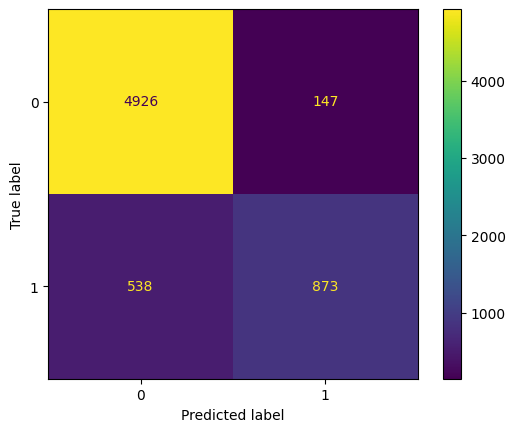

In [45]:
print("Imbalanced MLP Dataset Results")
print(classification_report(y_test, y_pred_ANN_labels))

# Confusion matrix for ANN
cm = confusion_matrix(y_test, y_pred_ANN_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

<html> <h3 style="font-style:italic; color:blue;"> Random Forest </h3> </html>

____________________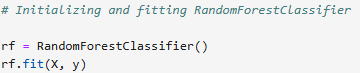

In [46]:
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

_______________________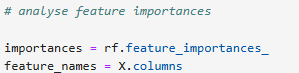

In [47]:
importances = rf.feature_importances_
feature_names = x.columns

#### Now just press 'CTRL' and 'ENTER' keys on the 4 next cells.

In [48]:
# Sort feature importances in descending order

indices = np.argsort(importances)[::-1]

In [49]:
# Print feature ranking

print("Feature ranking:")
for f in range(x.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature loan_percent_income (0.234659)
2. feature loan_int_rate (0.191708)
3. feature person_income (0.159672)
4. feature person_home_ownership (0.101705)
5. feature loan_amnt (0.077784)
6. feature loan_intent (0.067327)
7. feature person_emp_length (0.061652)
8. feature person_age (0.050381)
9. feature cb_person_cred_hist_length (0.039737)
10. feature cb_person_default_on_file (0.015376)


NameError: name 'X' is not defined

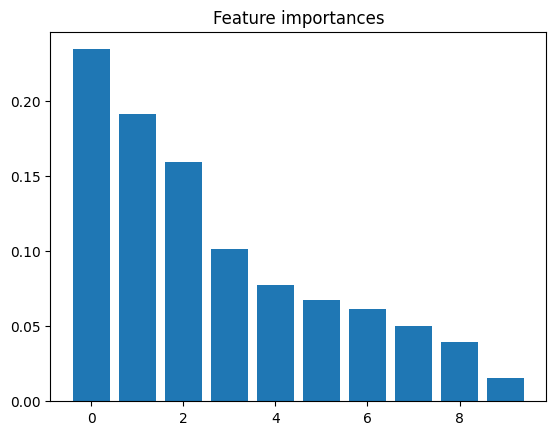

In [50]:
# Plot feature importances

plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.tight_layout()
plt.show()

In [51]:
# Random Forest

new_random = RandomForestClassifier(n_estimators=200,
                                criterion='gini',
                                max_features='sqrt',
                                max_depth=10,
                                min_samples_split=5,
                                min_samples_leaf=2,
                                random_state=42)

new_random.fit(X_train_imb, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

______________________

In [52]:
y_pred_random = new_random.predict(X_test_imb)

__________________________

In [53]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5073
           1       0.94      0.64      0.76      1411

    accuracy                           0.91      6484
   macro avg       0.93      0.81      0.85      6484
weighted avg       0.92      0.91      0.91      6484



#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

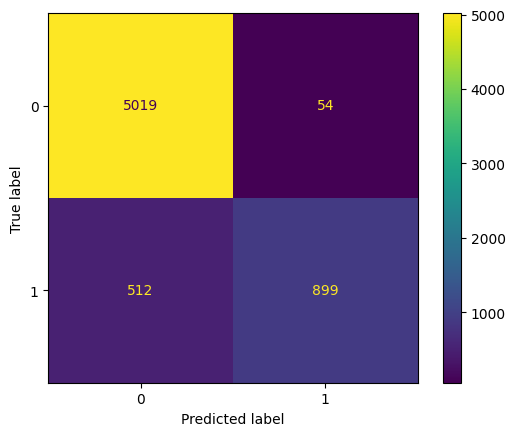

In [54]:
# Confusion matrix for Random Forest

cm_random = confusion_matrix(y_test, y_pred_random)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_random, display_labels=[0, 1])
disp_rf.plot()
plt.show();


<html> <h3 style="font-style:italic; color:blue;"> Logistic Regression </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the 4 next cells.

In [55]:
# Feature selection

# This is a meta-transformer that can be used with any model that assigns importance to each feature 
# through a specific importance_getter attribute called after training

feature_selector = SelectFromModel(LogisticRegression())
X_train_selected = feature_selector.fit_transform(X_train_imb, y_train)
X_test_selected = feature_selector.transform(X_test_imb)


In [56]:
# Defining the parameter grid for grid search

param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [57]:
# Perform grid search with cross-validation

grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), 
                           param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_imb, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [59]:
# Print the best parameters and the best cross-validation score

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.2f}')

Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.84


______________________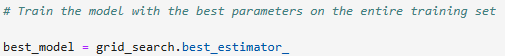

In [60]:
best_model = grid_search.best_estimator_

_________________________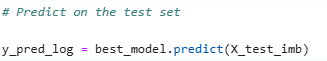

In [61]:
y_pred_log = best_model.predict(X_test_imb)

_________________________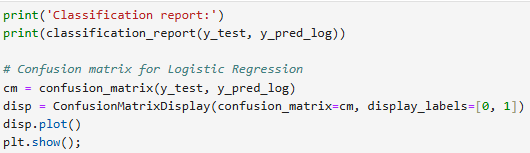

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5073
           1       0.73      0.40      0.52      1411

    accuracy                           0.84      6484
   macro avg       0.79      0.68      0.71      6484
weighted avg       0.83      0.84      0.82      6484



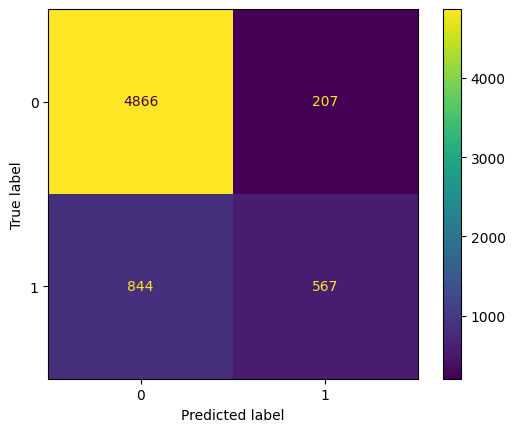

In [62]:
print('Classification report:')
print(classification_report(y_test, y_pred_log))
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5080
           1       0.72      0.43      0.53      1403

    accuracy                           0.84      6483
   macro avg       0.79      0.69      0.72      6483
weighted avg       0.83      0.84      0.82      6483



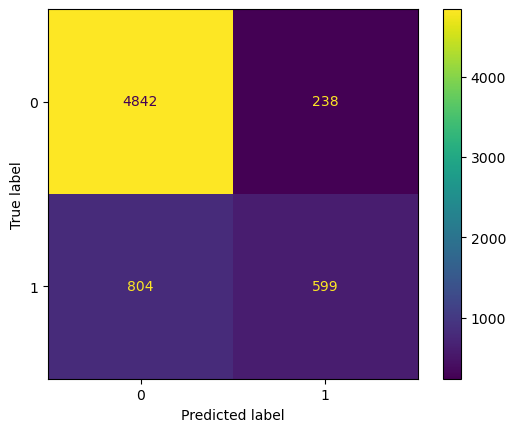

<html> <h3 style="font-style:italic; color:blue;"> Model Performance and Results Visualisation </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the 2next cells.

In [67]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score

In [68]:
imbalance_ai_models = ['Random Forest', 'Logistic Regression', 'MLP']
prediction_imb = [y_pred_random, y_pred_log, y_pred_ANN]

__________________________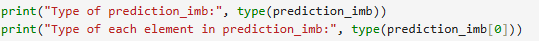

In [69]:
print("Type of prediction_imb:", type(prediction_imb))
print("Type of each element in prediction_imb:", type(prediction_imb[0]))

Type of prediction_imb: <class 'list'>
Type of each element in prediction_imb: <class 'numpy.ndarray'>


Type of prediction_imb: <class 'list'>
Type of each element in prediction_imb: <class 'numpy.ndarray'>


_________________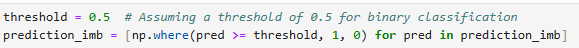

In [70]:
threshold = 0.5
prediction_imb = [np.where(pred >= threshold, 1, 0 ) for pred in prediction_imb]

#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [71]:
accuracy_imb = []
precision_imb = []
recall_imb =[]
f1_imb = []
auc_imb = []
for x in range(0, len(prediction_imb)):
    acc_score = np.round(accuracy_score(y_test, prediction_imb[x]) * 100, 2)
    accuracy_imb.append(acc_score)
    pre_score = np.round(precision_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    precision_imb.append(pre_score)
    rc_score = np.round(recall_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    recall_imb.append(rc_score)
    f_score = np.round(f1_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    f1_imb.append(f_score)
    auc_sc = np.round(roc_auc_score(y_test, prediction_imb[x]) * 100, 2)
    auc_imb.append(auc_sc)

In [72]:
model_perform_imb  = {'Imbalance AI Models':imbalance_ai_models,
              'Accuracy':accuracy_imb,
               'Precision':precision_imb,
               'Recall':recall_imb,
               'F1-Score':f1_imb,
               'AUC':auc_imb
              }
model_data_imb  = pd.DataFrame(model_perform_imb)
print('Result of testing with an Imbalanced Dataset')
model_data_imb

Result of testing with an Imbalanced Dataset


,Imbalance AI Models,Accuracy,Precision,Recall,F1-Score,AUC
0,Random Forest,91.27,91.52,91.27,90.61,81.32
1,Logistic Regression,83.79,82.62,83.79,81.91,68.05
2,MLP,89.44,89.16,89.44,88.78,79.49


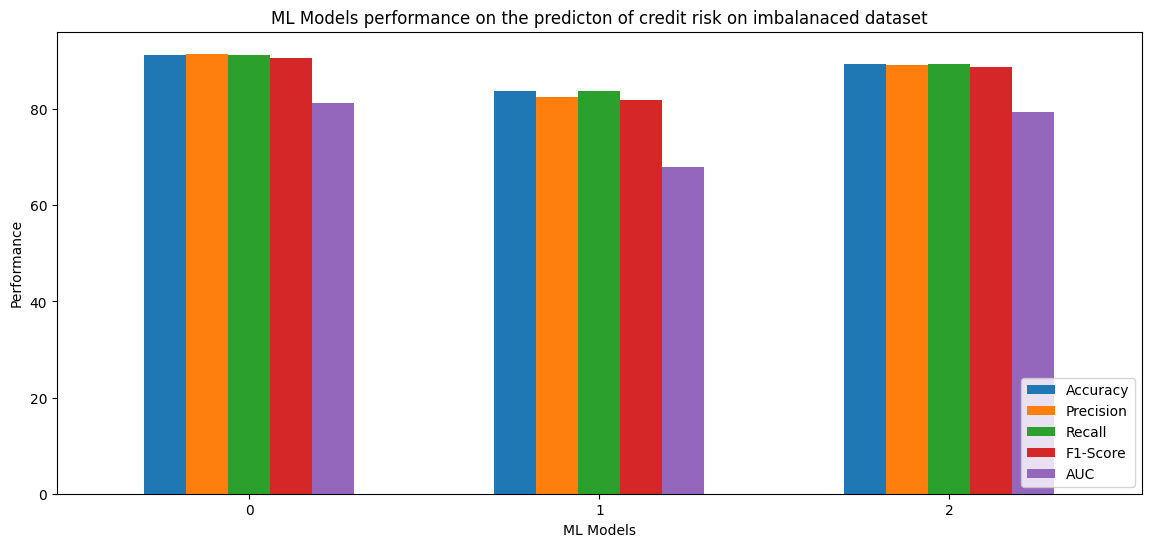

In [73]:
model_imb = model_data_imb.set_index('Imbalance AI Models')

model_data_imb.plot(kind='bar', figsize=(14,6), width=0.6)
plt.title('ML Models performance on the predicton of credit risk on imbalanaced dataset')
plt.ylabel('Performance')
plt.xlabel('ML Models')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Lab Logbook Requirement:

<html> <h3 style="font-style:italic; color:blue;">
   
1) Create and train your own LSTM model
2) Add all the LSTM's Error metrics: Accuracy, Precision, Recall, F1-Score and AUC to the final histogram "ML Models performance...".

</h3> </html>

<html> <h3 style="color:red;">
NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.
</h3> </html>

In [75]:
import numpy as np


X_train_lstm = X_train.to_numpy().reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm  = X_test.to_numpy().reshape((X_test.shape[0],  X_test.shape[1],  1))


In [77]:
model_lstm = keras.Sequential(
    [
        keras.layers.LSTM(
            64,
            activation='relu',
            input_shape=(10, 1)
        ),
        keras.layers.Dense(
            32,
            activation='relu'
        ),
        keras.layers.Dense(
            1,
            activation='sigmoid'
        )
    ]
)


/Users/addicted/Desktop/venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [83]:
model_lstm.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc')
    ]
)


In [92]:
history_lstm = model_lstm.fit(
    X_train_lstm, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test_lstm, y_test),
    verbose=1
)

Epoch 1/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7600 - auc: 0.6768 - loss: 0.8441 - precision: 0.4341 - recall: 0.2698 - val_accuracy: 0.8188 - val_auc: 0.7410 - val_loss: 0.4779 - val_precision: 0.6885 - val_recall: 0.3055
Epoch 2/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8198 - auc: 0.7500 - loss: 0.4644 - precision: 0.6709 - recall: 0.3393 - val_accuracy: 0.8239 - val_auc: 0.7521 - val_loss: 0.4538 - val_precision: 0.6473 - val_recall: 0.4189
Epoch 3/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8255 - auc: 0.7488 - loss: 0.4570 - precision: 0.7011 - recall: 0.3733 - val_accuracy: 0.8333 - val_auc: 0.7532 - val_loss: 0.4479 - val_precision: 0.6928 - val_recall: 0.4203
Epoch 4/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7816 - auc: 0.6855 - loss: 0.5602 - precision: 0.5073 - recall: 0.2423 - val_accuracy: 0.8142 - val_auc: 0.7609 - val_loss: 0.4400 - val_precision: 0.7384 - val_recall: 0.2261
Epoch 5/10
406/406 ━━━━━━━━━━━━━

In [96]:
metric_names = ['loss', 'accuracy', 'precision', 'recall', 'auc']
metrics_dict = dict(zip(metric_names, results))
print(metrics_dict)


{'loss': 0.4332784414291382, 'accuracy': 0.8278840184211731, 'precision': 0.7337559461593628, 'recall': 0.3281360864639282, 'auc': 0.7631334066390991}
